# Projeto controle despesas

## Intro

Aplicacao para realizar controle financeiro de despesas. 

## Requisitos

- Ler dados financeiros a partir de arquivo .csv
- Gerar relatorios
  

## Leitura de dados em csv

No arquivo csv, terao os dados a seguir:

- receita/despesa (0 ou 1)
- data da transacao (dd/mm/aaaa)
- valor (reais)
- descricao (texto livre)
- categoria (5 tipos)

dados_financeiros.csv
```
receita_despesa,data_transacao,valor,descricao,categoria
1,01/01/2025,2500.00,Salário mensal,Trabalho
0,05/01/2025,300.50,Supermercado,Alimentação
1,10/01/2025,1500.00,Freelance projeto X,Serviços
0,12/01/2025,120.00,Conta de luz,Contas
1,15/01/2025,800.00,Venda equipamento,Outros
0,18/01/2025,450.75,Restaurante,Alimentação
0,20/01/2025,90.00,Internet mensal,Contas
1,25/01/2025,600.00,Reembolso viagem,Serviços
0,28/01/2025,75.00,Transporte público,Contas
1,31/01/2025,200.00,Premiação interna,Trabalho
```

In [1]:
import pandas as pd
import numpy as np

# Configurações opcionais
pd.set_option('display.max_rows', 10)
pd.set_option('display.float_format', lambda x: f'{x:.2f}')

# Leitura do arquivo CSV
df = pd.read_csv('dados_financeiros.csv')

# Visualizar as 5 primeiras linhas
print(df.head())


   receita_despesa data_transacao   valor            descricao    categoria
0                1     01/01/2025 2500.00       Salário mensal     Trabalho
1                0     05/01/2025  300.50         Supermercado  Alimentação
2                0     05/01/2025  500.50             Farmacia        Saúde
3                1     10/01/2025 1500.00  Freelance projeto X     Serviços
4                0     12/01/2025  120.00         Conta de luz       Contas


## Relatórios

1. Resumo mensal por categoria

- Soma total de receitas e despesas agrupadas por categoria.
- Permite identificar onde há maior gasto ou fonte de renda.

In [2]:
relatorio1 = df.groupby(['categoria', 'receita_despesa'])['valor'].sum().unstack(fill_value=0)
print(relatorio1)

receita_despesa      0       1
categoria                     
Alimentação     751.25    0.00
Contas          285.00    0.00
Outros            0.00  800.00
Saúde           500.50    0.00
Serviços          0.00 2100.00
Trabalho          0.00 2700.00


Explicação passo a passo do código:

```python
relatorio1 = df.groupby(['categoria', 'receita_despesa'])['valor'].sum().unstack(fill_value=0)
```

1. **`df.groupby(['categoria', 'receita_despesa'])`**
   Agrupa o DataFrame pelas colunas `categoria` e `receita_despesa`.

   * Cada combinação de categoria (ex: "Alimentação") e tipo (0 = despesa, 1 = receita) será um grupo.

2. **`['valor'].sum()`**
   Dentro de cada grupo, soma os valores da coluna `valor`.

   * Exemplo: todas as despesas da categoria "Alimentação" serão somadas.

3. **`.unstack(fill_value=0)`**
   Transforma a hierarquia de índices (categoria × receita_despesa) em colunas, criando uma tabela mais legível:

   * As colunas “0” e “1” representam despesas e receitas.
   * `fill_value=0` substitui valores ausentes por zero.

Resultado:
Uma tabela onde cada linha é uma categoria, com duas colunas — total de **despesas (0)** e **receitas (1)** — resumindo o mês.


# Relatorio 2

2. Balanço geral do mês

- Total de receitas, despesas e saldo final.

In [3]:
def filtra_despesa(df):
    total = df.loc[df['receita_despesa'] == 0, 'valor']
    return total
    
def filtra_receita(df):
    total_receitas = df.loc[df['receita_despesa'] == 1, 'valor']
    return total_receitas

In [4]:
total_receitas = filtra_receita(df).sum()
total_despesas = filtra_despesa(df).sum()
saldo = total_receitas - total_despesas

print(f"Receitas: R${total_receitas:.2f}")
print(f"Despesas: R${total_despesas:.2f}")
print(f"Saldo: R${saldo:.2f}")


Receitas: R$5600.00
Despesas: R$1536.75
Saldo: R$4063.25


Explicação do **Relatório 2 – Balanço geral do mês**:

```python
total_receitas = df.loc[df['receita_despesa'] == 1, 'valor'].sum()
total_despesas = df.loc[df['receita_despesa'] == 0, 'valor'].sum()
saldo = total_receitas - total_despesas
```

1. **`df.loc[df['receita_despesa'] == 1, 'valor']`**
   Filtra apenas as linhas onde `receita_despesa` é **1** (ou seja, receitas) e seleciona a coluna `valor`.

2. **`.sum()`**
   Soma todos os valores dessas receitas → gera `total_receitas`.

3. **A segunda linha faz o mesmo para despesas**
   (`receita_despesa == 0`), resultando em `total_despesas`.

4. **`saldo = total_receitas - total_despesas`**
   Calcula o saldo líquido do período.

5. **`print(...)`**
   Mostra um resumo financeiro simples:

   * Receita total
   * Despesa total
   * Saldo final (positivo = lucro, negativo = prejuízo)


## Gráfico Relatório 1

Gráfico de barras — resumo por categoria  
Mostra receitas e despesas lado a lado por categoria.

<Figure size 800x500 with 0 Axes>

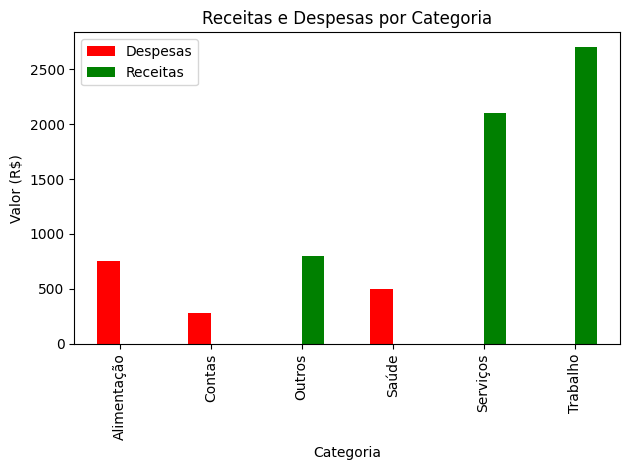

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Usa o relatorio1 criado antes
plt.figure(figsize=(8,5))
relatorio1.plot(kind='bar', color=['red', 'green'])
plt.title('Receitas e Despesas por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Valor (R$)')
plt.legend(['Despesas', 'Receitas'])
plt.tight_layout()
plt.show()


## Gráfico Relatório 2

Gráfico de pizza — composição das despesas.  
Mostra a proporção de cada categoria no total das despesas.

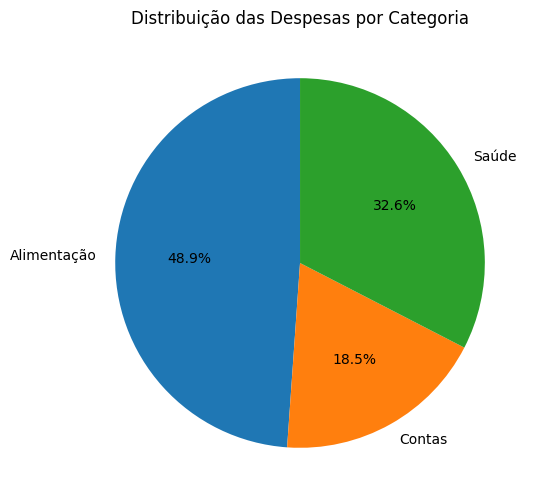

In [6]:
despesas = df[df['receita_despesa'] == 0].groupby('categoria')['valor'].sum()

plt.figure(figsize=(6,6))
despesas.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribuição das Despesas por Categoria')
plt.ylabel('')
plt.show()


## Gráfico de barras - balanço geral
Comparação entre total de receitas e despesas.

C:\Users\jane\AppData\Local\Temp\ipykernel_28632\503068231.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Tipo', y='Valor', data=df_balanco, palette=['green', 'red'])


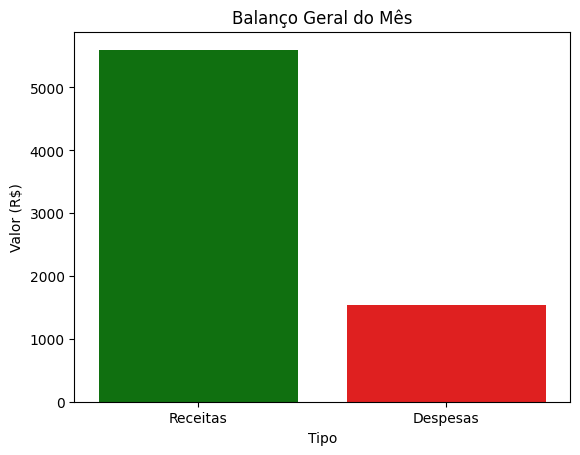

In [8]:
dados = {'Tipo': ['Receitas', 'Despesas'], 'Valor': [total_receitas, total_despesas]}
df_balanco = pd.DataFrame(dados)

sns.barplot(x='Tipo', y='Valor', data=df_balanco, palette=['green', 'red'])
plt.title('Balanço Geral do Mês')
plt.ylabel('Valor (R$)')
plt.show()
